必要なライブラリのインポート


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import GPy
from GPy import kern as gp_kern
import numpy as np
from scipy.stats import norm
from sklearn.metrics import r2_score
import time

In [2]:
OUTPUT_LOG = True
NUM_CANDIDATES = 20

In [3]:
def debug_print(*args):
    if OUTPUT_LOG:
        print(*args)

データの読み込み


In [4]:
# データの読み込み
df = pd.read_csv(
    "data.csv",
    engine="python",
    encoding="utf-8",
)

# IDをインデックスに設定
df = df.set_index("ID")
debug_print(df)

# 重複行の確認（全データセットに対して）
duplicates = df[df.duplicated(keep=False)]
debug_print(duplicates)

# 'energy'列にデータがある行のみを抽出
df_with_energy = df.dropna(subset=["energy"])
debug_print(df_with_energy)

# 'energy'列にデータがない行のみを抽出
df_without_energy = df[df["energy"].isnull()].drop(columns=["energy"])
debug_print(df_without_energy)

min_index = df["energy"].idxmin()
min_value = min(df["energy"])
debug_print(min_index, min_value)

         Ni  Ni_Mg  Cu_Ni  Co_Ni  Zn_Ni  Mg  Cu_Mg  Co_Mg  Zn_Mg  Cu  Co_Cu  \
ID                                                                            
1         5     13     13     18     18   7     15     14     16   5     16   
2         9     11     16     11     16   7     15     17     15   5     18   
3         4     14     14     18     18   6     18     17     11   7     13   
4         5     13     14     16     19   6     16     17     14   4     11   
5         5     20     14     16     12   4     11     17     16   6     17   
...      ..    ...    ...    ...    ...  ..    ...    ...    ...  ..    ...   
999996    5     12     14     16     20   7     18     11     17   3     17   
999997    4     15     14     19     16   5     10     15     22   8     17   
999998    8     14     16     12     14   5     15     18     15   6     13   
999999    5     13     18     17     14   4     13     14     24   7     12   
1000000   6     18     14     18     10   6     12  

ガウス過程回帰の処理


In [5]:
# 特徴量とターゲット変数の分割
X = df_with_energy.iloc[:, :-1]
y = df_with_energy.iloc[:, -1:]

# ガウス過程回帰モデルの設定と訓練
num = X.shape[1]
kernel = gp_kern.RBF(num) * gp_kern.Bias(num) + gp_kern.Linear(num) * gp_kern.Bias(num)
model = GPy.models.GPRegression(X.values, y.values, kernel=kernel, normalizer=True)
model.optimize()

データの y と予測された y'の比較


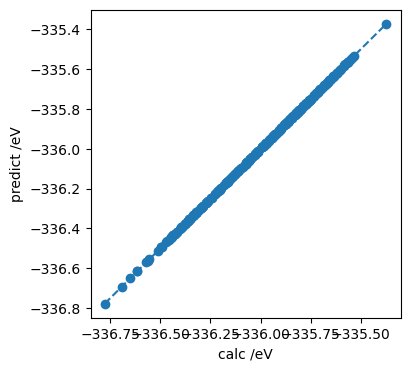

In [6]:
pred_y, _ = model.predict(X.values)
if OUTPUT_LOG:
    fig_vs = plt.figure(figsize=(4, 4))
    plt.scatter(y.values.flatten(), pred_y.flatten())
    plt.plot([min(y.values), max(y.values)], [min(y.values), max(y.values)], ls="--")
    plt.xlabel("calc /eV")
    plt.ylabel("predict /eV")
    plt.show()

In [7]:
# 相関係数と決定係数の計算
correlation_coefficient = np.corrcoef(y.values.flatten(), pred_y.flatten())[0, 1]
r2 = r2_score(y.values, pred_y)

debug_print(f"相関係数: {correlation_coefficient:.3f}")
debug_print(f"決定係数 (R²): {r2:.3f}")

相関係数: 1.000
決定係数 (R²): 1.000


ガウス過程回帰の結果のプロット(1 次元プロット)


[(0, 6), (1, 14), (2, 18), (3, 12), (4, 16), (5, 4), (6, 18), (7, 13), (8, 19), (9, 0), (10, 21), (11, 15), (12, 11), (13, 16), (14, 9)]
Ni


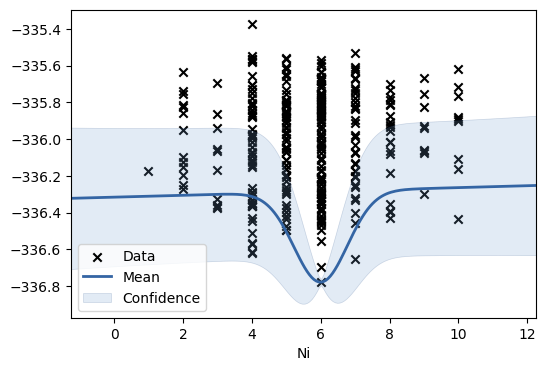

[(0, 6), (1, 14), (2, 18), (3, 12), (4, 16), (5, 4), (6, 18), (7, 13), (8, 19), (9, 0), (10, 21), (11, 15), (12, 11), (13, 16), (14, 9)]
Ni_Mg


<Figure size 640x480 with 0 Axes>

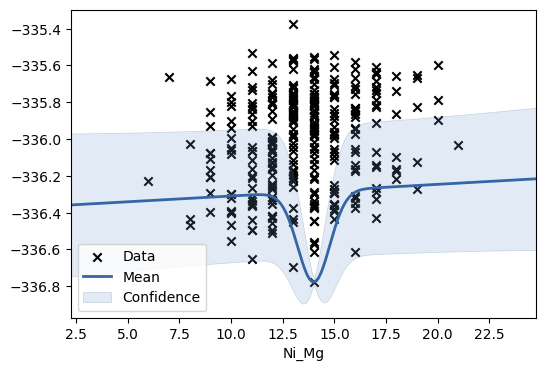

[(0, 6), (1, 14), (2, 18), (3, 12), (4, 16), (5, 4), (6, 18), (7, 13), (8, 19), (9, 0), (10, 21), (11, 15), (12, 11), (13, 16), (14, 9)]
Cu_Ni


<Figure size 640x480 with 0 Axes>

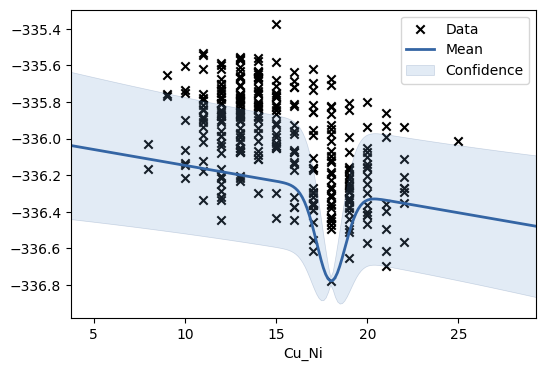

[(0, 6), (1, 14), (2, 18), (3, 12), (4, 16), (5, 4), (6, 18), (7, 13), (8, 19), (9, 0), (10, 21), (11, 15), (12, 11), (13, 16), (14, 9)]
Co_Ni


<Figure size 640x480 with 0 Axes>

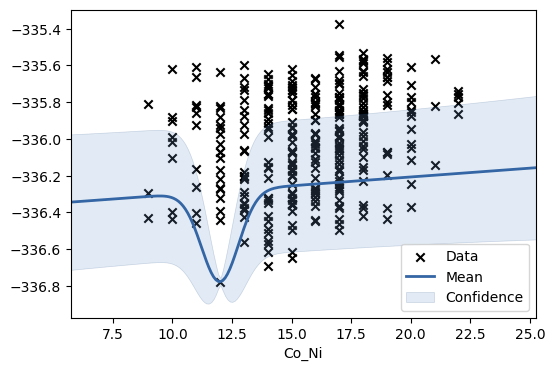

[(0, 6), (1, 14), (2, 18), (3, 12), (4, 16), (5, 4), (6, 18), (7, 13), (8, 19), (9, 0), (10, 21), (11, 15), (12, 11), (13, 16), (14, 9)]
Zn_Ni


<Figure size 640x480 with 0 Axes>

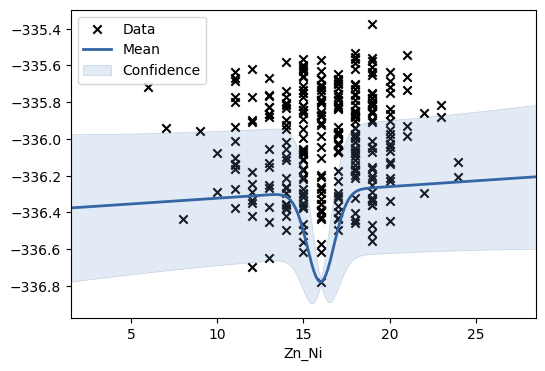

[(0, 6), (1, 14), (2, 18), (3, 12), (4, 16), (5, 4), (6, 18), (7, 13), (8, 19), (9, 0), (10, 21), (11, 15), (12, 11), (13, 16), (14, 9)]
Mg


<Figure size 640x480 with 0 Axes>

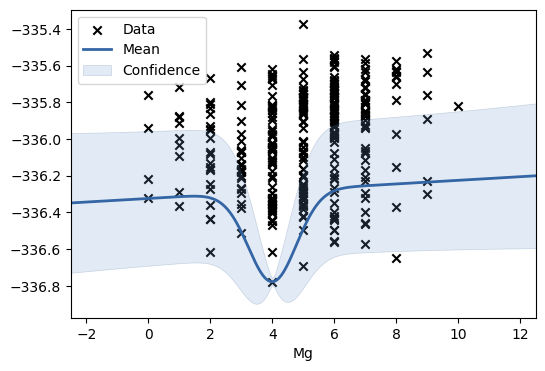

[(0, 6), (1, 14), (2, 18), (3, 12), (4, 16), (5, 4), (6, 18), (7, 13), (8, 19), (9, 0), (10, 21), (11, 15), (12, 11), (13, 16), (14, 9)]
Cu_Mg


<Figure size 640x480 with 0 Axes>

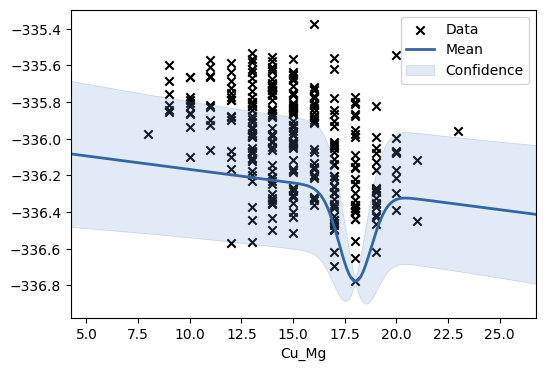

[(0, 6), (1, 14), (2, 18), (3, 12), (4, 16), (5, 4), (6, 18), (7, 13), (8, 19), (9, 0), (10, 21), (11, 15), (12, 11), (13, 16), (14, 9)]
Co_Mg


<Figure size 640x480 with 0 Axes>

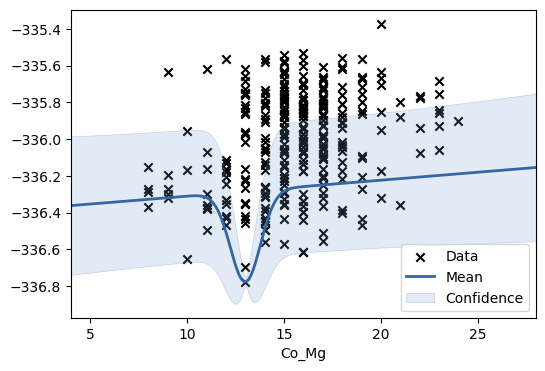

[(0, 6), (1, 14), (2, 18), (3, 12), (4, 16), (5, 4), (6, 18), (7, 13), (8, 19), (9, 0), (10, 21), (11, 15), (12, 11), (13, 16), (14, 9)]
Zn_Mg


<Figure size 640x480 with 0 Axes>

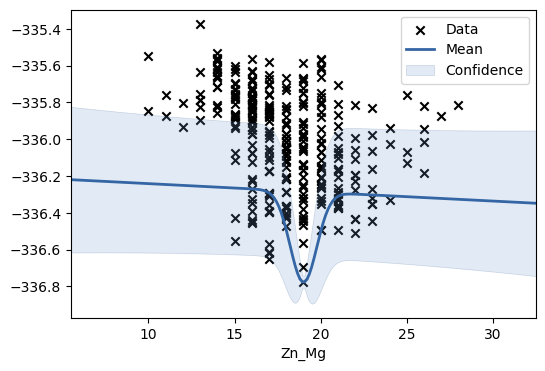

[(0, 6), (1, 14), (2, 18), (3, 12), (4, 16), (5, 4), (6, 18), (7, 13), (8, 19), (9, 0), (10, 21), (11, 15), (12, 11), (13, 16), (14, 9)]
Cu


<Figure size 640x480 with 0 Axes>

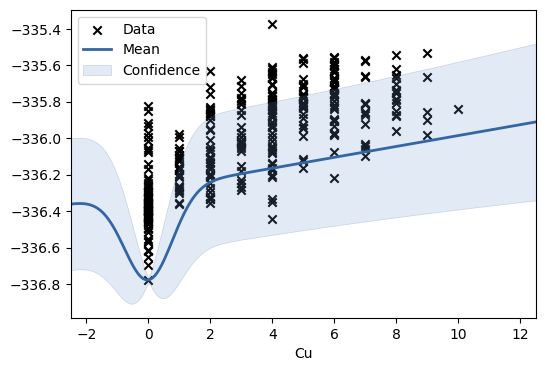

[(0, 6), (1, 14), (2, 18), (3, 12), (4, 16), (5, 4), (6, 18), (7, 13), (8, 19), (9, 0), (10, 21), (11, 15), (12, 11), (13, 16), (14, 9)]
Co_Cu


<Figure size 640x480 with 0 Axes>

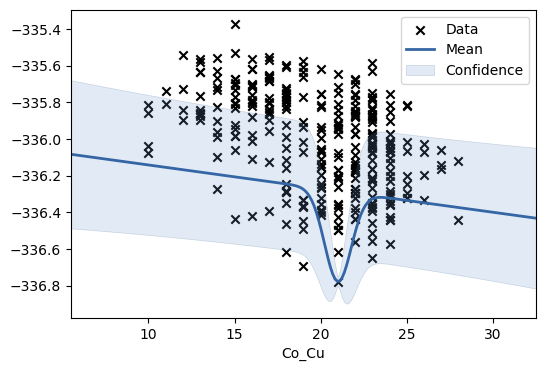

[(0, 6), (1, 14), (2, 18), (3, 12), (4, 16), (5, 4), (6, 18), (7, 13), (8, 19), (9, 0), (10, 21), (11, 15), (12, 11), (13, 16), (14, 9)]
Zn_Cu


<Figure size 640x480 with 0 Axes>

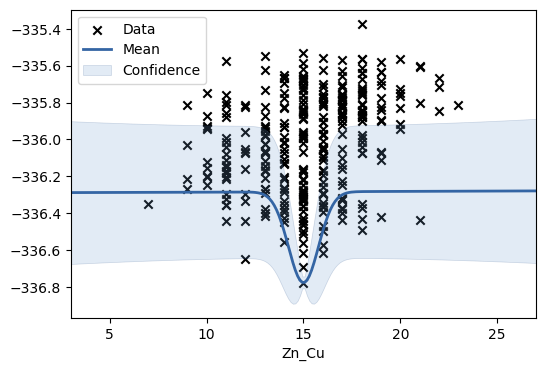

[(0, 6), (1, 14), (2, 18), (3, 12), (4, 16), (5, 4), (6, 18), (7, 13), (8, 19), (9, 0), (10, 21), (11, 15), (12, 11), (13, 16), (14, 9)]
Co


<Figure size 640x480 with 0 Axes>

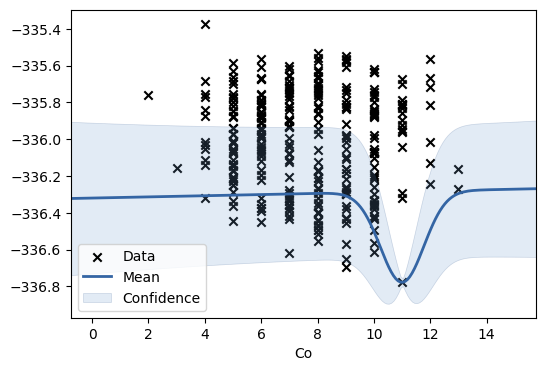

[(0, 6), (1, 14), (2, 18), (3, 12), (4, 16), (5, 4), (6, 18), (7, 13), (8, 19), (9, 0), (10, 21), (11, 15), (12, 11), (13, 16), (14, 9)]
Zn_Co


<Figure size 640x480 with 0 Axes>

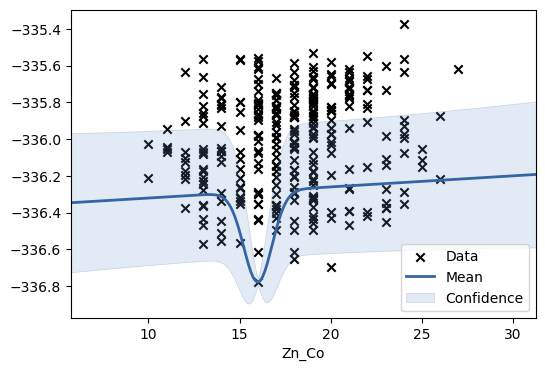

[(0, 6), (1, 14), (2, 18), (3, 12), (4, 16), (5, 4), (6, 18), (7, 13), (8, 19), (9, 0), (10, 21), (11, 15), (12, 11), (13, 16), (14, 9)]
Zn


<Figure size 640x480 with 0 Axes>

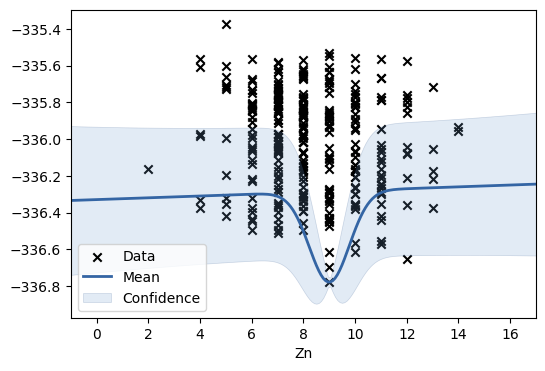

<Figure size 640x480 with 0 Axes>

In [8]:
# save_dir = "./images/"
# print(X.loc[min_index,:])
if OUTPUT_LOG:
    for i in range(len(X.columns)):
        vis_dim = [(vis1, vis2) for vis1, vis2 in enumerate(X.loc[min_index, :])]

        debug_print(vis_dim)

        view_variable = i
        vis_dim.pop(view_variable)
        debug_print(X.columns[view_variable])
        # vis_dim[0] =(0,0)
        # vis_dim[1] =(1,1)
        # Optimize後
        fig = plt.figure(figsize=(6, 4))
        # fig.suptitle(X.columns[i])

        ax = fig.add_subplot(111)
        ax.set_xlabel(X.columns[i])
        model.plot(fixed_inputs=vis_dim, plot_density=False, ax=ax)
        # if save_dir != None:
        #     plt.savefig(os.path.join(save_dir,
        #                 ""+X.columns[i]+"_.png"))
        # plt.ylim(-4,0)
        plt.show()
        plt.clf()

---


ガウス過程回帰の結果のプロット(2 次元プロット)


In [9]:
# # gd = [40,45,50,55,60]
# # eu = [2,4,6,8,10]
# # sm = [2,4,6,8,10]
# Zn = [2,4,6,8,10]


# for i in Zn:
#     fig = plt.figure(figsize=(6, 4))
#     fig.suptitle(X.columns[0]+ str(i))
#     ax = fig.add_subplot(111)
#     ax.set_xlabel(X.columns[1])
#     ax.set_ylabel(X.columns[2])

#     # ax.contour( cmap="jet", levels=10, alpha=1)
#     model.plot(
#                 fixed_inputs=[(0, i)],
#                 plot_data=False,
#                 ax=ax,
#                 color=plt.get_cmap('jet')
#                 )

ベイズ最適化


獲得関数


In [10]:
# 獲得関数
def acquisition_lcb(mean, std, kappa):
    a = mean - kappa * std
    return a


def acquisition_EI(mean, std, min_value, xi=0.001):
    imp = min_value - mean - xi
    Z = imp / std
    ei = imp * norm.cdf(Z) + std * norm.pdf(Z)
    return ei

予測する特徴量の範囲を指定


In [11]:
progress_count = 0
progress_level = 0
total_iterations = df.shape[0] - df_with_energy.shape[0]
progress_interval = total_iterations // 50 + 1

debug_print(total_iterations)

start_time = time.time()


def display_progress():
    global progress_count
    global progress_level
    progress_count += 1

    current_level = progress_count // progress_interval

    if not (current_level > progress_level or progress_count == total_iterations):
        return

    progress_level = current_level
    elapsed_time = time.time() - start_time
    debug_print(
        f"Progress: {progress_count}/{total_iterations} ({progress_count/total_iterations*100:.2f}%), Elapsed time: {elapsed_time:.2f}s"
    )

    debug_print(f"progress_count: {progress_count}, progress_level: {progress_level}")

999700


各特徴量での獲得関数の計算


In [12]:
means = []
stds = []
acs_ei = []
acs_lcb = []

itera = df_without_energy.values

debug_print(itera)

for item in itera:
    display_progress()

    # 期待値と分散
    mean, val = model.predict(np.array(item).reshape(1, -1))
    # 標準偏差
    std = np.sqrt(val)

    # 獲得関数(EI)
    ac_ei = acquisition_EI(mean, std, min_value)
    # 獲得関数(LCB)
    ac_lcb = acquisition_lcb(mean, std, 7)

    # それぞれをリストにまとめる
    means.append(mean.flatten()[0])
    stds.append(std.flatten()[0])
    acs_ei.append(ac_ei.flatten()[0])
    acs_lcb.append(ac_lcb.flatten()[0])

[[ 8 15 10 ...  8 22 10]
 [ 5 16 11 ...  8 22  8]
 [ 5 12 13 ...  6 15 10]
 ...
 [ 8 14 16 ...  9 23  8]
 [ 5 13 18 ... 11 19  6]
 [ 6 18 14 ... 10 15 13]]
Progress: 19995/999700 (2.00%), Elapsed time: 7.39s
progress_count: 19995, progress_level: 1
Progress: 39990/999700 (4.00%), Elapsed time: 14.82s
progress_count: 39990, progress_level: 2
Progress: 59985/999700 (6.00%), Elapsed time: 22.50s
progress_count: 59985, progress_level: 3
Progress: 79980/999700 (8.00%), Elapsed time: 32.51s
progress_count: 79980, progress_level: 4
Progress: 99975/999700 (10.00%), Elapsed time: 43.26s
progress_count: 99975, progress_level: 5
Progress: 119970/999700 (12.00%), Elapsed time: 50.86s
progress_count: 119970, progress_level: 6
Progress: 139965/999700 (14.00%), Elapsed time: 58.58s
progress_count: 139965, progress_level: 7
Progress: 159960/999700 (16.00%), Elapsed time: 73.15s
progress_count: 159960, progress_level: 8
Progress: 179955/999700 (18.00%), Elapsed time: 80.69s
progress_count: 179955, prog

提案された特徴量を Pandas データフレームとして出力


In [13]:
result_df = pd.DataFrame(df_without_energy)
result_df = result_df.assign(mean=means, std=stds, EI=acs_ei, LCB=acs_lcb)

In [14]:
# LCBが最小の行を取得
result_df_sort = result_df.sort_values("LCB", ascending=True)
min_lcb_id = result_df_sort.index[0]

debug_print("ID with the minimum LCB value:", min_lcb_id)

ID with the minimum LCB value: 422153


EI を降順にプロット


In [15]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

result_df_sort = result_df.sort_values("EI", ascending=False)
# 上位20個を表示
result_df_sort[:20]
# 下位20個を表示
# result_df_sort[-20:]

,Ni,Ni_Mg,Cu_Ni,Co_Ni,Zn_Ni,Mg,Cu_Mg,Co_Mg,Zn_Mg,Cu,Co_Cu,Zn_Cu,Co,Zn_Co,Zn,mean,std,EI,LCB
ID,,,,,,,,,,,,,,,,,,,
174238,7,10,19,13,16,6,16,14,20,1,21,14,8,20,7,-336.224936,0.182475,0.000061,-337.502262
663601,5,11,18,16,17,5,19,14,18,0,18,17,10,16,8,-336.223728,0.182710,0.000061,-337.502696
435714,4,15,18,17,14,4,17,13,19,0,20,17,7,20,7,-336.223048,0.182526,0.000059,-337.500729
998829,3,15,19,15,17,4,15,16,18,0,22,16,6,19,7,-336.221317,0.183030,0.000059,-337.502526
997932,4,14,18,19,13,3,19,15,18,0,19,16,6,19,9,-336.220405,0.183186,0.000059,-337.502708
974515,5,12,19,18,13,6,15,14,19,0,22,16,5,20,8,-336.220772,0.182950,0.000058,-337.501422
17211,4,16,20,14,14,4,16,14,18,1,21,13,7,21,9,-336.220667,0.182749,0.000057,-337.499914
472790,6,14,18,16,12,5,15,14,19,0,22,17,7,18,9,-336.221324,0.182485,0.000057,-337.498718
422153,3,13,16,19,18,5,15,12,22,0,23,18,6,18,4,-336.214169,0.184508,0.000056,-337.505723


LCB を昇順にプロット


In [16]:
result_df_sort = result_df.sort_values("LCB", ascending=True)
# 上位20個を表示
result_df_sort[:20]
# 下位20個を表示
# result_df_sort[-20:]

,Ni,Ni_Mg,Cu_Ni,Co_Ni,Zn_Ni,Mg,Cu_Mg,Co_Mg,Zn_Mg,Cu,Co_Cu,Zn_Cu,Co,Zn_Co,Zn,mean,std,EI,LCB
ID,,,,,,,,,,,,,,,,,,,
422153,3,13,16,19,18,5,15,12,22,0,23,18,6,18,4,-336.214169,0.184508,0.000056,-337.505723
997932,4,14,18,19,13,3,19,15,18,0,19,16,6,19,9,-336.220405,0.183186,0.000059,-337.502708
663601,5,11,18,16,17,5,19,14,18,0,18,17,10,16,8,-336.223728,0.182710,0.000061,-337.502696
998829,3,15,19,15,17,4,15,16,18,0,22,16,6,19,7,-336.221317,0.183030,0.000059,-337.502526
174238,7,10,19,13,16,6,16,14,20,1,21,14,8,20,7,-336.224936,0.182475,0.000061,-337.502262
974515,5,12,19,18,13,6,15,14,19,0,22,16,5,20,8,-336.220772,0.182950,0.000058,-337.501422
435714,4,15,18,17,14,4,17,13,19,0,20,17,7,20,7,-336.223048,0.182526,0.000059,-337.500729
17211,4,16,20,14,14,4,16,14,18,1,21,13,7,21,9,-336.220667,0.182749,0.000057,-337.499914
415204,6,13,15,15,17,4,18,13,20,0,21,18,8,19,5,-336.218518,0.183046,0.000056,-337.499838


In [17]:
result_df_sort = result_df.sort_values("mean", ascending=True)
result_df_sort[:20]
# result_df_sort[-20:]

,Ni,Ni_Mg,Cu_Ni,Co_Ni,Zn_Ni,Mg,Cu_Mg,Co_Mg,Zn_Mg,Cu,Co_Cu,Zn_Cu,Co,Zn_Co,Zn,mean,std,EI,LCB
ID,,,,,,,,,,,,,,,,,,,
174238,7,10,19,13,16,6,16,14,20,1,21,14,8,20,7,-336.224936,0.182475,0.000061,-337.502262
663601,5,11,18,16,17,5,19,14,18,0,18,17,10,16,8,-336.223728,0.182710,0.000061,-337.502696
435714,4,15,18,17,14,4,17,13,19,0,20,17,7,20,7,-336.223048,0.182526,0.000059,-337.500729
472790,6,14,18,16,12,5,15,14,19,0,22,17,7,18,9,-336.221324,0.182485,0.000057,-337.498718
998829,3,15,19,15,17,4,15,16,18,0,22,16,6,19,7,-336.221317,0.183030,0.000059,-337.502526
353080,6,15,17,12,16,4,16,13,20,1,22,15,10,17,8,-336.221193,0.182265,0.000056,-337.497045
68253,7,13,15,15,15,4,18,15,18,0,23,16,7,17,9,-336.221167,0.182252,0.000056,-337.496932
974515,5,12,19,18,13,6,15,14,19,0,22,16,5,20,8,-336.220772,0.182950,0.000058,-337.501422
17211,4,16,20,14,14,4,16,14,18,1,21,13,7,21,9,-336.220667,0.182749,0.000057,-337.499914


候補 3 つの ID を出力


In [18]:
result_df_sort = result_df.sort_values("LCB", ascending=True)
debug_print(result_df_sort.head(NUM_CANDIDATES).index.tolist())

[422153, 997932, 663601, 998829, 174238, 974515, 435714, 17211, 415204, 242769, 104673, 472790, 414369, 801311, 143794, 353080, 37019, 68253, 101772, 272093]
